<a href="https://colab.research.google.com/github/Harshiit17/projects-2/blob/main/Project_8_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [75]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car_data.csv')

In [76]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [77]:
# checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [78]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [79]:
# checking the number of missing values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [80]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


Encoding the Categorical Data

In [104]:
# encoding "Fuel_Type" Column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2, 'LPG':3, 'Electric':4}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1, 'Trustmark Dealer':2}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding "Owner" Column
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3}},inplace=True)

# Remove rows where 'owner' is 'Test Drive Car' as it's an unexpected value
car_dataset = car_dataset[car_dataset['owner'] != 'Test Drive Car']

/tmp/ipython-input-104-1311428209.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3}},inplace=True)


In [82]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


Splitting the data and Target

In [83]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [84]:
print(X)

      year  km_driven  fuel  seller_type  transmission owner
0     2007      70000     0            1             0     0
1     2007      50000     0            1             0     0
2     2012     100000     1            1             0     0
3     2017      46000     0            1             0     0
4     2014     141000     1            1             0     1
...    ...        ...   ...          ...           ...   ...
4335  2014      80000     1            1             0     1
4336  2014      80000     1            1             0     1
4337  2009      83000     0            1             0     1
4338  2016      90000     1            1             0     0
4339  2016      40000     0            1             0     0

[4323 rows x 6 columns]


In [85]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4323, dtype: int64


In [105]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4323 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4323 non-null   object
 1   year           4323 non-null   int64 
 2   selling_price  4323 non-null   int64 
 3   km_driven      4323 non-null   int64 
 4   fuel           4323 non-null   int64 
 5   seller_type    4323 non-null   int64 
 6   transmission   4323 non-null   int64 
 7   owner          4323 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 433.0+ KB


Splitting Training and Test data

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [88]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [89]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [90]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [91]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4354959634529427


Visualize the actual prices and Predicted prices

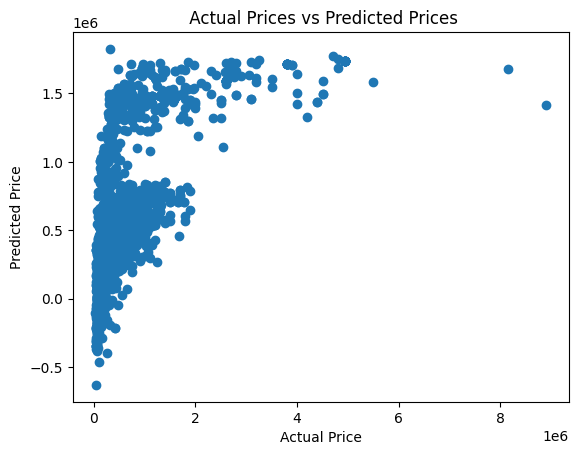

In [92]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [93]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [94]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4226574016155107


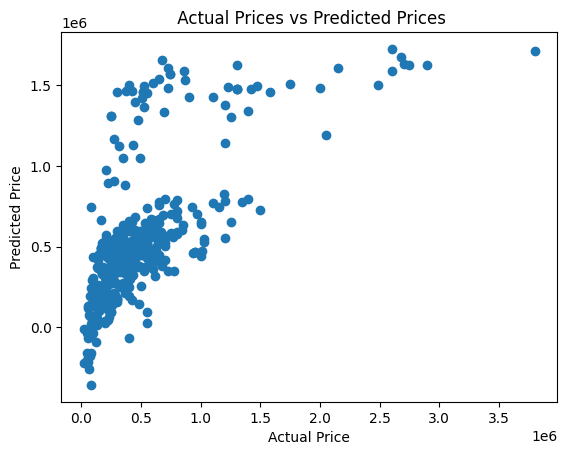

In [95]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [96]:
# loading the linear regression model
lass_reg_model = Lasso()

In [97]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [98]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [99]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4354959633999719


Visualize the actual prices and Predicted prices

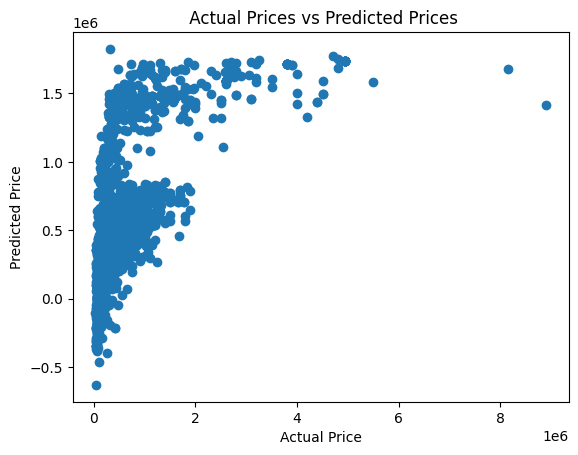

In [100]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [101]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [102]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.42266073460248077


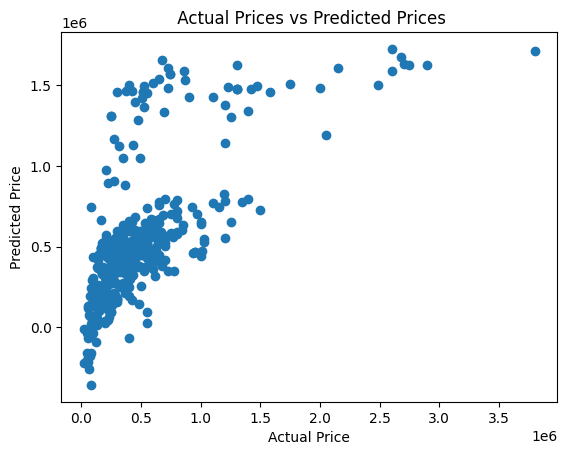

In [103]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()